In [1]:
# classifier and attacker
# dataset: mnist
# author: Ying Meng

# ---------------------
# import required packages
# ---------------------
from __future__ import division, absolute_import, print_function
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from tensorflow.keras import layers, models
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from cleverhans.evaluation import batch_eval
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.
W0703 10:29:49.413345 140169983756032 deprecation_wrapper.py:119] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/cleverhans/utils_tf.py:341: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.



In [2]:
# parameters
IMG_ROW = 28
IMG_COL = 28
LR = 0.001
BATCH_SIZE = 128
VAL_RATE = 0.2

In [3]:
'''
Load data
@author: Ying Meng (y.meng201011(at)gmail(dot)com)
'''
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, IMG_ROW, IMG_COL, 1)
X_test = X_test.reshape(-1, IMG_ROW, IMG_COL, 1)
# cast pixels to floats, normalize to [0, 1] range
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot-encode the labels
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

nb_train = int(len(X_train) * VAL_RATE)
train_samples = X_train[:-nb_train]
train_classes = Y_train[:-nb_train]
val_samples = X_train[-nb_train:]
val_classes = Y_train[-nb_train:]

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


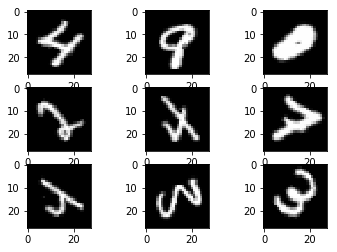

In [4]:
# define data preparation
datagen = ImageDataGenerator(rotation_range = 90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

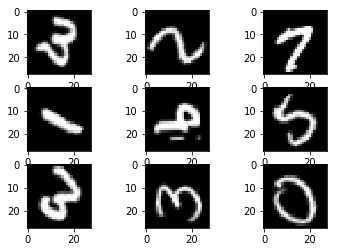

In [5]:
# define data preparation
datagen = ImageDataGenerator(rotation_range = 90)
# fit parameters from data
datagen.fit(X_test)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_test, Y_test, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [6]:
'''
Define model structures for some datasets.
@author: Ying Meng (y.meng201011(at)gmail(dot)com)
'''
# Set random seed
np.random.seed(0)

# datasets
DATASETS = ['mnist', 'cifar']

def cnn(dataset='mnist'):
    """
    Takes in a parameter indicating which model type to use ('mnist', or
    'cifar') and returns the appropriate Keras model.
    :param dataset: A string indicating which dataset we are building
                    a model for.
    :return: The model; a Keras 'Sequential' instance.
    """
    assert dataset in DATASETS, "dataset parameter must be either 'mnist' or 'cifar'"

    if dataset == 'mnist':
        # MNIST model
        struct = [
            layers.Conv2D(32, (3, 3), input_shape = (IMG_ROW, IMG_COL, 1)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Conv2D(64, (3, 3)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Flatten(),
            layers.Dense(64 * 64),
            layers.Dropout(rate = 0.4),
            layers.Dense(10),
            layers.Activation('softmax')
        ]
    elif dataset == 'cifar':
        # CIFAR-10 model
        raise NotImplementedError('Not ready yet.')

    model = models.Sequential()
    for layer in struct:
        model.add(layer)

    return model

In [7]:
# Define the model
model = cnn('mnist')
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])
# Train the model
model.fit(train_samples, train_classes, epochs = 15,
          batch_size = BATCH_SIZE, shuffle = True,
          verbose = 1, validation_data = (val_samples, val_classes))

# Save the model
model.save("data/mnist_Rotate90_cnn.h5")
print("Trained model has been saved to data/ \subfolder")

W0703 10:29:50.824276 140169983756032 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 32s 674us/sample - loss: 0.1584 - acc: 0.9511 - val_loss: 0.0580 - val_acc: 0.9830
Epoch 2/15
48000/48000 [==============================] - 34s 701us/sample - loss: 0.0526 - acc: 0.9842 - val_loss: 0.0448 - val_acc: 0.9866
Epoch 3/15
48000/48000 [==============================] - 33s 687us/sample - loss: 0.0377 - acc: 0.9882 - val_loss: 0.0477 - val_acc: 0.9871
Epoch 4/15
48000/48000 [==============================] - 33s 696us/sample - loss: 0.0322 - acc: 0.9896 - val_loss: 0.0405 - val_acc: 0.9897
Epoch 5/15
48000/48000 [==============================] - 34s 699us/sample - loss: 0.0253 - acc: 0.9918 - val_loss: 0.0417 - val_acc: 0.9891
Epoch 6/15
48000/48000 [==============================] - 34s 708us/sample - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0381 - val_acc: 0.9898
Epoch 7/15
48000/48000 [==============================] - 33s 690us/sample - loss: 0.0154 - acc: 0.9953 

In [8]:
# Load the trained model
model = load_model("data/mnist_cnn.h5")

_, acc = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc: {}'.format(100 * acc))

W0703 10:38:07.253730 140169983756032 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0703 10:38:07.255573 140169983756032 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


test acc: 99.019998312


In [9]:
def fgsm(x, prediction, epsilon, y = None):
    '''
    Define the symbolic FGSM fitting tf framework
    Ying Meng
    '''
    if y is None:
        y = tf.to_float(tf.equal(prediction, 
                                tf.reduce_max(prediction, 1, keepdims = True)))
        
    y /= tf.reduce_sum(y, 1, keepdims = True)
    
    logits, = prediction.op.inputs
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = y))

    grad, = tf.gradients(loss, x)
    perturbation = epsilon * tf.sign(grad)
    adv_sample = tf.stop_gradient(x + perturbation)
    
    return adv_sample

In [10]:
# Create TF session
sess = tf.Session()
K.set_session(sess)
K.set_learning_phase(0)

# define tf placeholders and operations
x = tf.placeholder(tf.float32, shape = (None,) + X_test.shape[1:])
y = tf.placeholder(tf.float32, shape = (None,) + Y_test.shape[1:])

# load model
model = load_model("data/mnist_cnn.h5")

# model accuracy
_, acc_original = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print('test acc (on original): {}'.format(acc_original))

# symbolic fgsm
epsilon = 0.25
x_adv = fgsm(x, model(x), epsilon = epsilon, y = y)

# craft adversarial examples
X_adv, = batch_eval(sess, [x, y], [x_adv], [X_test, Y_test], batch_size = BATCH_SIZE)

# test accuracy on adversarial examples
_, acc_adv = model.evaluate(X_adv, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc (on adversarial): {} - (epsilon: {})'.format(acc_adv, epsilon))

# save the generated adversarial examples
np.save("data/adv_mnist_fgsm_eps25.npy", X_adv)
print('adversarial examples were generated and saved to data/ \subfolder')
#sess.close()

test acc (on original): 0.99019998312
test acc (on adversarial): 0.29929998517 - (epsilon: 0.25)
adversarial examples were generated and saved to data/ \subfolder


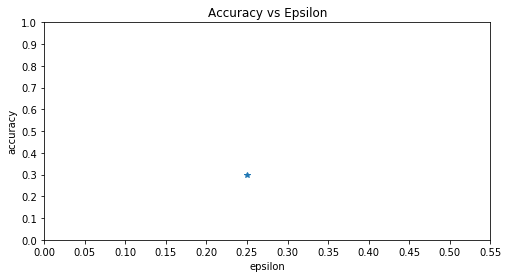

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(epsilon, acc_adv, "*-")
plt.yticks(np.arange(0, 1.1, step = 0.1))
plt.xticks(np.arange(0, .6, step = 0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("epsilon")
plt.ylabel("accuracy")
plt.show()

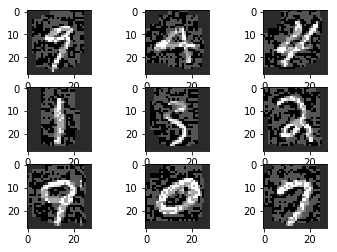

In [30]:
# define data preparation
datagen = ImageDataGenerator(rescale=1./255)
# fit parameters from data
datagen.fit(X_adv)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_adv, Y_test, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [11]:
# Error Rate
# 1. load the model
model = load_model("data/mnist_cnn.h5")
# 2. load the adversarial examples
X_adv, = batch_eval(sess, [x, y], [x_adv], [X_test, Y_test], batch_size = BATCH_SIZE)
_, acc_adv = model.evaluate(X_adv, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc (on adversarial): {} - (epsilon: {})'.format(acc_adv, epsilon))
adv_pred = model.predict(X_adv)
totaladvcount = 0
count = 0
prediction =np.argmax(adv_pred,axis=1)
for i in range(len(prediction)):
    if (prediction[i]==np.argmax(Y_test[i])):
        totaladvcount = totaladvcount+1
    if (np.argmax(adv_pred[i]) != np.argmax(prediction[i])):
        count= count+1
        print("predicate class: {}, True label: {}, totaladv: {}, counter: {} ".format(prediction, Y_test, totaladvcount, count))
error_rate = (1.0 * count/totaladvcount)
print("error rate is: " + str(error_rate))

test acc (on adversarial): 0.29929998517 - (epsilon: 0.25)
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 0, counter: 1 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1, counter: 2 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1, counter: 3 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1, counter: 4 
predicate class: [2 2

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 98, counter: 352 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 98, counter: 353 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 98, counter: 354 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 99, counter: 355 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0.

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 175, counter: 699 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 175, counter: 700 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 176, counter: 701 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 176, counter: 702 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 299, counter: 1105 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 299, counter: 1106 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 299, counter: 1107 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 299, counter: 1108 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 421, counter: 1515 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 422, counter: 1516 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 422, counter: 1517 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 422, counter: 1518 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 531, counter: 1898 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 531, counter: 1899 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 532, counter: 1900 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 532, counter: 1901 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

 [0. 0. 0. ... 0. 0. 0.]], totaladv: 617, counter: 2230 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 617, counter: 2231 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 617, counter: 2232 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 617, counter: 2233 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 617, counter: 2234 
pre

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 707, counter: 2566 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 707, counter: 2567 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 707, counter: 2568 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 707, counter: 2569 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 825, counter: 2979 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 825, counter: 2980 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 825, counter: 2981 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 825, counter: 2982 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 942, counter: 3394 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 942, counter: 3395 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 942, counter: 3396 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 942, counter: 3397 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1078, counter: 3802 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1079, counter: 3803 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1079, counter: 3804 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1080, counter: 3805 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1197, counter: 4216 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1198, counter: 4217 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1198, counter: 4218 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1198, counter: 4219 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1309, counter: 4621 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1310, counter: 4622 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1310, counter: 4623 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1310, counter: 4624 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1416, counter: 4987 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1417, counter: 4988 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1417, counter: 4989 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1418, counter: 4990 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1418, counter: 4991

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1535, counter: 5294 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1535, counter: 5295 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1536, counter: 5296 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1537, counter: 5297 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1648, counter: 5635 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1649, counter: 5636 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1650, counter: 5637 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1650, counter: 5638 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1800, counter: 6040 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1802, counter: 6041 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1802, counter: 6042 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1802, counter: 6043 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1926, counter: 6351 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1926, counter: 6352 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1926, counter: 6353 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1926, counter: 6354 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1927, counter: 6355

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2029, counter: 6678 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2029, counter: 6679 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2030, counter: 6680 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2030, counter: 6681 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2167, counter: 7069 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2167, counter: 7070 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2167, counter: 7071 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2168, counter: 7072 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2294, counter: 7427 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2294, counter: 7428 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2294, counter: 7429 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2294, counter: 7430 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2389, counter: 7765 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2389, counter: 7766 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2390, counter: 7767 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2390, counter: 7768 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2476, counter: 8094 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2476, counter: 8095 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2476, counter: 8096 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2476, counter: 8097 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2615, counter: 8456 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2615, counter: 8457 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2615, counter: 8458 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2615, counter: 8459 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2766, counter: 8867 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2766, counter: 8868 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2766, counter: 8869 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2766, counter: 8870 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2908, counter: 9273 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2908, counter: 9274 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2908, counter: 9275 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2908, counter: 9276 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

In [12]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, IMG_ROW, IMG_COL, 1)
X_test = X_test.reshape(-1, IMG_ROW, IMG_COL, 1)
# cast pixels to floats, normalize to [0, 1] range
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot-encode the labels
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

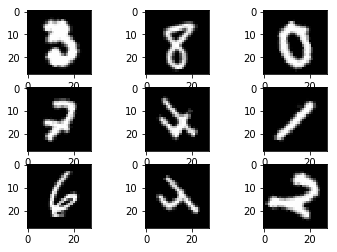

In [13]:
# define data preparation
datagen = ImageDataGenerator(rotation_range = 90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

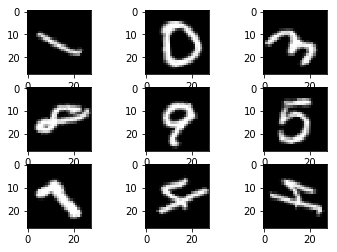

In [14]:
# define data preparation
datagen = ImageDataGenerator(rotation_range = 90)
# fit parameters from data
datagen.fit(X_test)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_test, Y_test, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [15]:
'''
Define model structures for some datasets.
@author: Ying Meng (y.meng201011(at)gmail(dot)com)
'''
# Set random seed
np.random.seed(0)

# datasets
DATASETS = ['mnist', 'cifar']

def cnn(dataset='mnist'):
    """
    Takes in a parameter indicating which model type to use ('mnist', or
    'cifar') and returns the appropriate Keras model.
    :param dataset: A string indicating which dataset we are building
                    a model for.
    :return: The model; a Keras 'Sequential' instance.
    """
    assert dataset in DATASETS, "dataset parameter must be either 'mnist' or 'cifar'"

    if dataset == 'mnist':
        # MNIST model
        struct = [
            layers.Conv2D(32, (3, 3), input_shape = (IMG_ROW, IMG_COL, 1)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Conv2D(64, (3, 3)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Flatten(),
            layers.Dense(64 * 64),
            layers.Dropout(rate = 0.4),
            layers.Dense(10),
            layers.Activation('softmax')
        ]
    elif dataset == 'cifar':
        # CIFAR-10 model
        raise NotImplementedError('Not ready yet.')

    model = models.Sequential()
    for layer in struct:
        model.add(layer)

    return model

In [16]:
# Define the model
model = cnn('mnist')
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])
# Train the model
model.fit(train_samples, train_classes, epochs = 15,
          batch_size = BATCH_SIZE, shuffle = True,
          verbose = 1, validation_data = (val_samples, val_classes))

# Save the model
model.save("data/mnist_Rotate90_cnn.h5")
print("Trained model has been saved to data/ \subfolder")

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 31s 655us/sample - loss: 0.1544 - acc: 0.9525 - val_loss: 0.0647 - val_acc: 0.9808
Epoch 2/15
48000/48000 [==============================] - 30s 618us/sample - loss: 0.0526 - acc: 0.9838 - val_loss: 0.0510 - val_acc: 0.9847
Epoch 3/15
48000/48000 [==============================] - 30s 620us/sample - loss: 0.0382 - acc: 0.9880 - val_loss: 0.0424 - val_acc: 0.9874
Epoch 4/15
48000/48000 [==============================] - 31s 644us/sample - loss: 0.0278 - acc: 0.9909 - val_loss: 0.0438 - val_acc: 0.9878
Epoch 5/15
48000/48000 [==============================] - 30s 625us/sample - loss: 0.0242 - acc: 0.9922 - val_loss: 0.0515 - val_acc: 0.9852
Epoch 6/15
48000/48000 [==============================] - 30s 626us/sample - loss: 0.0191 - acc: 0.9934 - val_loss: 0.0442 - val_acc: 0.9887
Epoch 7/15
48000/48000 [==============================] - 30s 625us/sample - loss: 0.0156 - acc: 0.9949 

In [17]:
# Load the trained model
model = load_model("data/mnist_cnn.h5")

_, acc = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc: {}'.format(100 * acc))

test acc: 99.019998312
